## Set up environment to load packages 


In [2]:
pip install netcdf4

     |████████████████████████████████| 4.1MB 5.0MB/s 
     |████████████████████████████████| 317kB 46.1MB/s 


In [0]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr 
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal
from pandas import read_csv
import seaborn as sns

## Load in all data sets 

In [0]:
series = read_csv('/Table1.csv') ## ORG Time Series 
series3 = read_csv('/Table27.csv') ## TOC2BC and Age
series4 = read_csv('/age_parameters.csv') ## Age Parameters 

## Make Time Series Plot of OA 

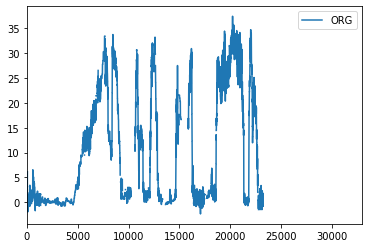

In [6]:
series.plot()
plt.show()

#### learn how to set axis as time series. 
To do:
1.   axis labels 
2.   chart title 

## Look at TOC2BC etc vs Age. 
#### Already know what to expect but want to see what correlation plot looks like. 
#### Plotting all the ratios vs age. Already know TOC2BC, NO32BC, and NH42BC decrease with Age, but SO42BC does not.  

(4, 9)

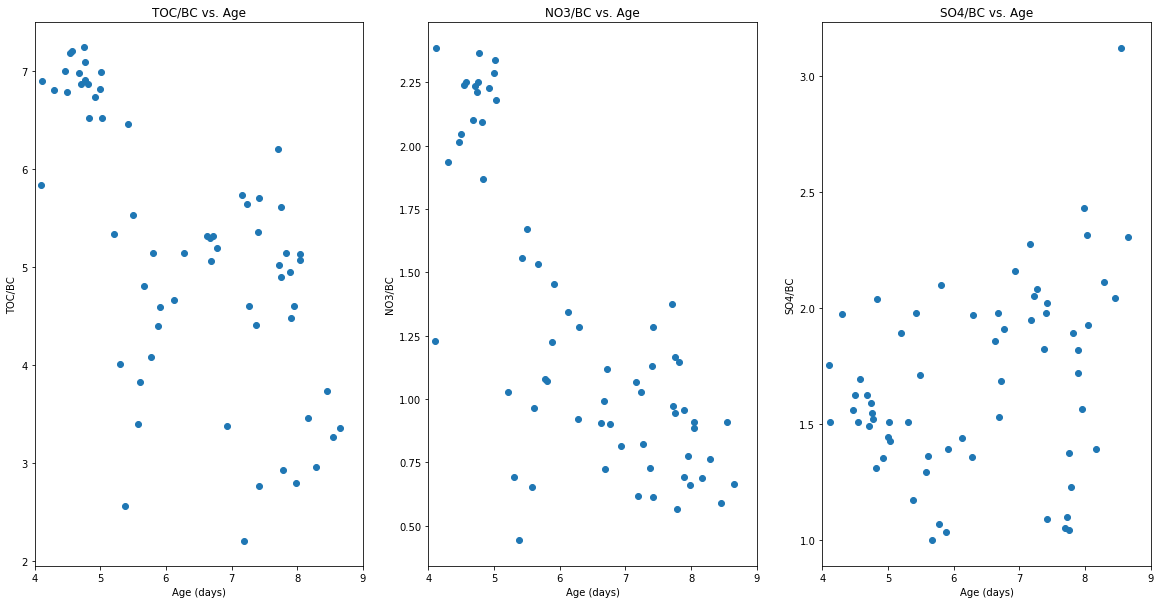

In [7]:
fig5, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.scatter(series3.age9, series3.toc2bc) 
ax1.set_title('TOC/BC vs. Age')
ax1.set_xlabel('Age (days)')
ax1.set_ylabel('TOC/BC')
ax1.set_xlim(4,9)

ax2.scatter(series3.age9, series3.no32bc) 
ax2.set_title('NO3/BC vs. Age')
ax2.set_xlabel('Age (days)')
ax2.set_ylabel('NO3/BC')
ax2.set_xlim(4,9)


ax3.scatter(series3.age9, series3.so42bc) 
ax3.set_title('SO4/BC vs. Age')
ax3.set_xlabel('Age (days)')
ax3.set_ylabel('SO4/BC')
ax3.set_xlim(4,9)

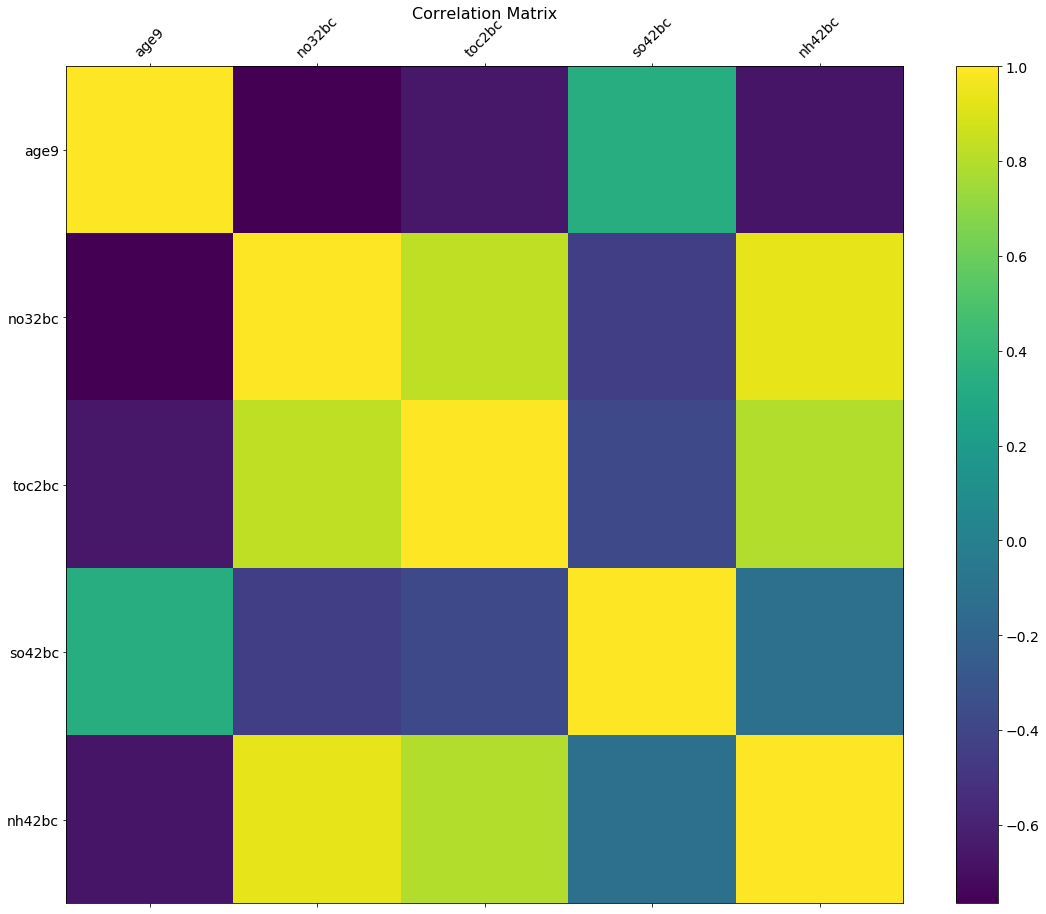

In [8]:
f = plt.figure(figsize=(19, 15))
plt.matshow(series3.corr(), fignum=f.number)
plt.xticks(range(series3.shape[1]), series3.columns, fontsize=14, rotation=45)
plt.yticks(range(series3.shape[1]), series3.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [9]:
rs = np.random.RandomState(0)
corr = series3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,age9,no32bc,toc2bc,so42bc,nh42bc
age9,1,-0.77,-0.65,0.33,-0.67
no32bc,-0.77,1,0.83,-0.44,0.94
toc2bc,-0.65,0.83,1,-0.38,0.8
so42bc,0.33,-0.44,-0.38,1,-0.12
nh42bc,-0.67,0.94,0.8,-0.12,1


#### Really want to look at species correlation with age. Want negative correlation so I see how this can be confusing / misleading if I didn't already know the relationship. But good sanity check I think.

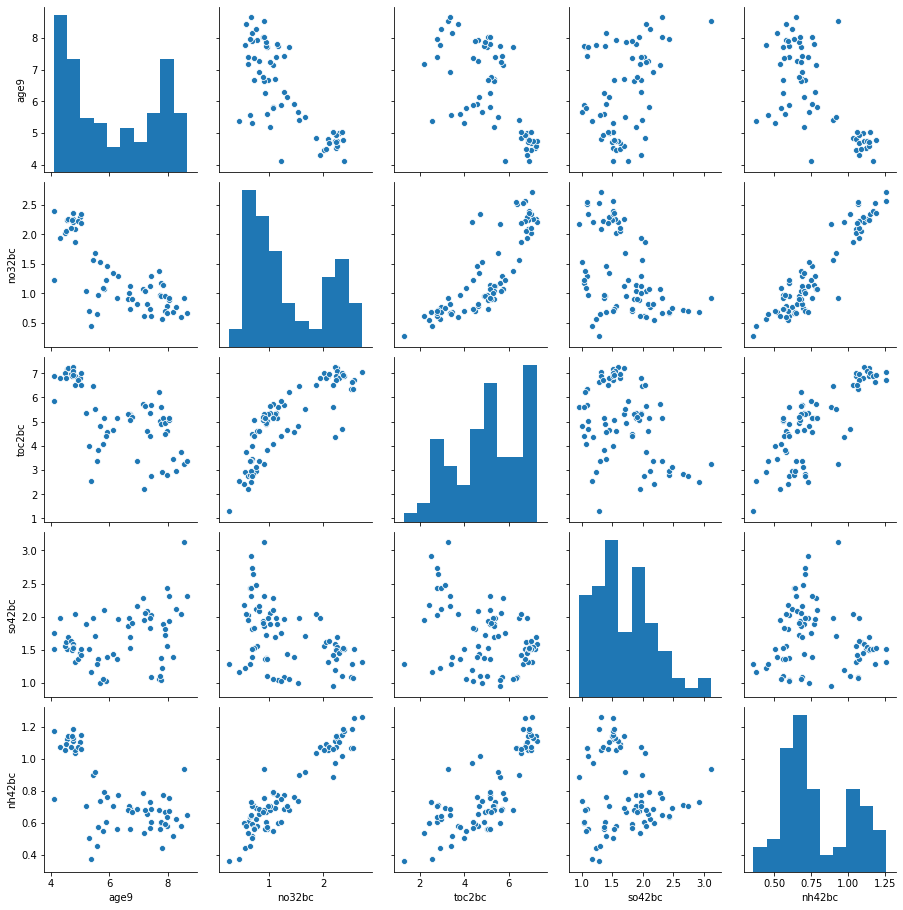

In [10]:
sns.pairplot(series3)

#### Now I want to look at how different parameters for age correlate. I primarily use the variable f44 but I have other indicators. This will potentially provide me with validation to use a different (or better) variable instead of f44. Cool. 

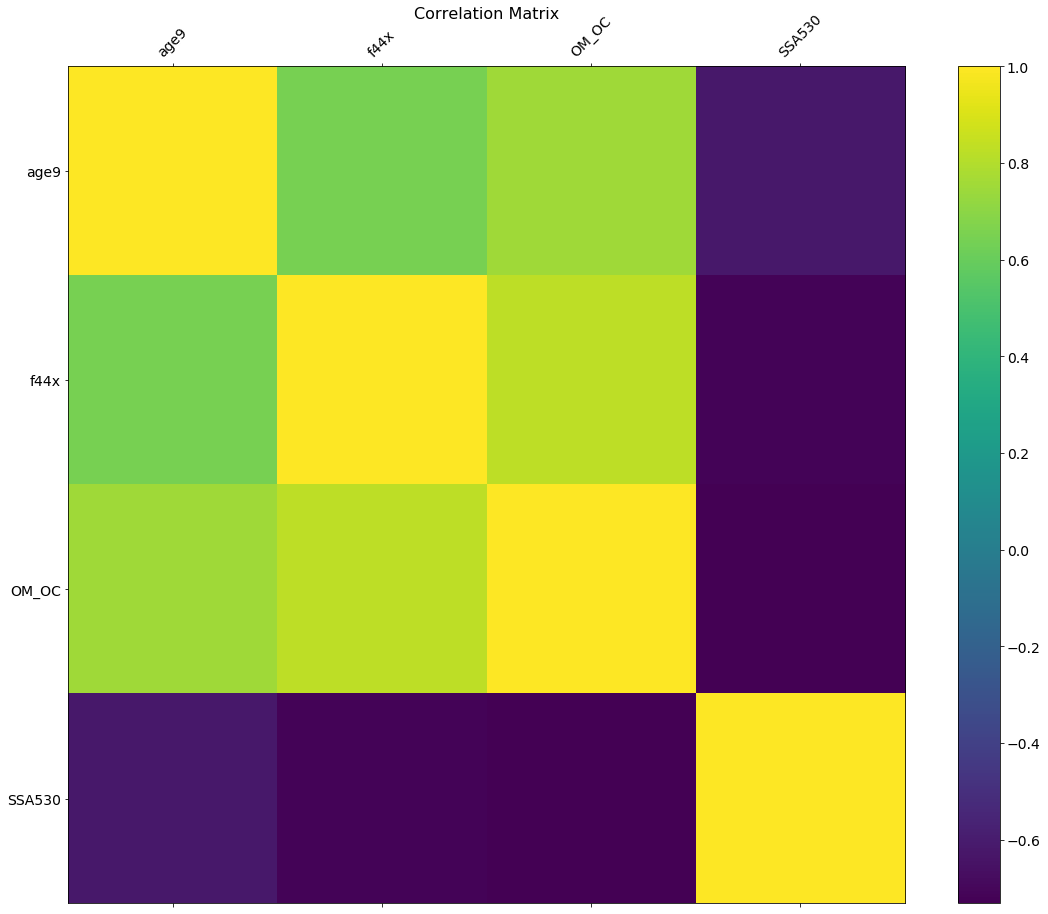

In [11]:
f = plt.figure(figsize=(19, 15))
plt.matshow(series4.corr(), fignum=f.number)
plt.xticks(range(series4.shape[1]), series4.columns, fontsize=14, rotation=45)
plt.yticks(range(series4.shape[1]), series4.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

#### What I know - SSA should have a negative correlation with age. As age increases SSA decreases. OMOC and f44 are very closely related so I expect them to have a high correlation. What I want to know is which variable is better to use? f44 or OMOC? OMOC is from my high resolution analysis but f44 is more robust. So far it looks like OMOC has the stronger correlation! 

In [13]:
rs = np.random.RandomState(0)
corr = series4.corr()
corr.style.background_gradient(cmap='coolwarm')

,age9,f44x,OM_OC,SSA530
age9,1,0.642004,0.75185,-0.621893
f44x,0.642004,1,0.827418,-0.717541
OM_OC,0.75185,0.827418,1,-0.731399
SSA530,-0.621893,-0.717541,-0.731399,1


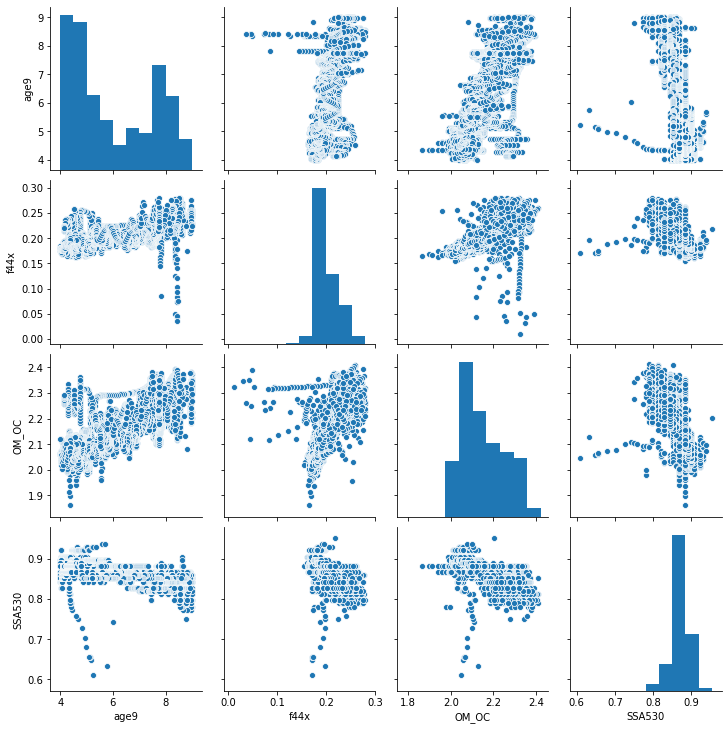

In [14]:
sns.pairplot(series4)

#### F44 is great because it is so robust and OMOC can be user dependent due to the HR analysis methods. Both f44 and OMOC have upper limits due to aerosol volatility - but it looks like OMOC might be more resolved than f44 - f44 seems to hit its upper limit faster (less dramatic of an increase with age due to the aerosol is already "aged". We are looking at old and older aerosol so maybe OMOC is a better parameter to observe these changes with age! 